## imported libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Analysis

## Read csv file

In [2]:
df = pd.read_csv('best-selling-mobile-phones.csv')
df

,manufacturer,model,form,smartphone,year,units_sold_m
0,Nokia,1100,Bar,No,2003,250.0
1,Nokia,1110,Bar,No,2005,247.5
2,Apple,iPhone 6 and iPhone 6 Plus,Touchscreen,Yes,2014,224.0
3,Nokia,"105 (2013), 105 (2015)",Bar,No,2013,200.0
4,Apple,iPhone 6S and iPhone 6S Plus,Touchscreen,Yes,2015,174.1
...,...,...,...,...,...,...
106,LG,G2,Touchscreen,Yes,2013,3.0
107,LeTV,LeEco Le 1s,Touchscreen,Yes,2016,3.0
108,Google,Pixel and Pixel XL,Touchscreen,Yes,2016,2.1
109,Palm,Centro,Keyboard bar,Yes,2007,2.0


## Basic Informations about Dataset

In [3]:
df.columns

Index(['manufacturer', 'model', 'form', 'smartphone', 'year', 'units_sold_m'], dtype='object')

In [4]:
df.index

RangeIndex(start=0, stop=111, step=1)

In [5]:
df.shape

(111, 6)

In [6]:
df.size

666

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  111 non-null    object 
 1   model         111 non-null    object 
 2   form          111 non-null    object 
 3   smartphone    111 non-null    object 
 4   year          111 non-null    int64  
 5   units_sold_m  111 non-null    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.3+ KB


In [12]:
df.describe(percentiles=[.2, .4, .6, .8], include='all')

,manufacturer,model,form,smartphone,year,units_sold_m
count,111,111,111,111,111.000000,111.000000
unique,14,111,7,2,NaN,NaN
top,Samsung,1100,Touchscreen,Yes,NaN,NaN
freq,35,1,70,76,NaN,NaN
mean,NaN,NaN,NaN,NaN,2011.864865,50.447748
std,NaN,NaN,NaN,NaN,6.147411,59.167349
min,NaN,NaN,NaN,NaN,1996.000000,2.000000
20%,NaN,NaN,NaN,NaN,2006.000000,10.000000
40%,NaN,NaN,NaN,NaN,2009.000000,16.000000
50%,NaN,NaN,NaN,NaN,2012.000000,24.200000


## manufacturers name list and their models list

In [9]:
mob_name = df['manufacturer'].unique()
mob_name

array(['Nokia', 'Apple', 'Samsung', 'Motorola', 'Huawei', 'LG', 'Xiaomi',
       'HTC', 'Sony Ericsson', 'Research In Motion (RIM)', 'Oppo', 'LeTV',
       'Google', 'Palm'], dtype=object)

In [10]:
df.groupby(['manufacturer'])['model'].unique()

manufacturer
Apple                       [iPhone 6 and iPhone 6 Plus, iPhone 6S and iPh...
Google                                                   [Pixel and Pixel XL]
HTC                                                             [Thunderbolt]
Huawei                      [P20, P20 Pro and P20 Lite, P30 and P30 Pro, M...
LG                          [KP100, Chocolate VX8500, Cookie (KP500), Shin...
LeTV                                                            [LeEco Le 1s]
Motorola                         [RAZR V3, StarTAC, C200, C139, Droid Bionic]
Nokia                       [1100, 1110, 105 (2013), 105 (2015), 3210, 660...
Oppo                                                            [A5, F1 Plus]
Palm                                                                 [Centro]
Research In Motion (RIM)                                   [BlackBerry Pearl]
Samsung                     [E1100, Galaxy S III and Galaxy S III Mini, Ga...
Sony Ericsson                                [K300 

## Year-wise sale a.to Model with their manufacturer 

In [13]:
year_wise_sales = df.groupby(['year', 'manufacturer', 'model'])['units_sold_m'].sum().reset_index()
year_wise_sales

,year,manufacturer,model,units_sold_m
0,1996,Motorola,StarTAC,60.0
1,1999,Nokia,3210,161.0
2,2000,Nokia,3310 (3330),126.0
3,2003,Motorola,C200,60.0
4,2003,Nokia,1100,250.0
...,...,...,...,...
106,2020,Samsung,Galaxy A11,15.3
107,2020,Samsung,Galaxy A21s,19.4
108,2020,Samsung,"Galaxy S20, Galaxy S20+ and Galaxy S20 Ultra",28.0
109,2020,Xiaomi,Redmi Note 9 Pro,15.0


In [49]:
yearly_sales_by_manufacturer = df.pivot_table(index='year', columns='manufacturer', values='units_sold_m', aggfunc='sum', fill_value=0)
yearly_sales_by_manufacturer

manufacturer,Apple,Google,HTC,Huawei,LG,LeTV,Motorola,Nokia,Oppo,Palm,Research In Motion (RIM),Samsung,Sony Ericsson,Xiaomi
year,,,,,,,,,,,,,,
1996,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,126.0,0.0,0.0,0.0,0.0,0.0,0.0
2003,0.0,0.0,0.0,0.0,0.0,0.0,60.0,473.0,0.0,0.0,0.0,10.0,0.0,0.0
2004,0.0,0.0,0.0,0.0,0.0,0.0,130.0,295.0,0.0,0.0,0.0,0.0,15.0,0.0
2005,0.0,0.0,0.0,0.0,0.0,0.0,60.0,422.5,0.0,0.0,0.0,0.0,15.0,0.0
2006,0.0,0.0,0.0,0.0,21.0,0.0,0.0,77.0,0.0,0.0,15.0,30.0,15.0,0.0
2007,6.0,0.0,0.0,0.0,5.0,0.0,0.0,340.0,0.0,2.0,0.0,0.0,0.0,0.0
2008,0.0,0.0,0.0,0.0,40.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0


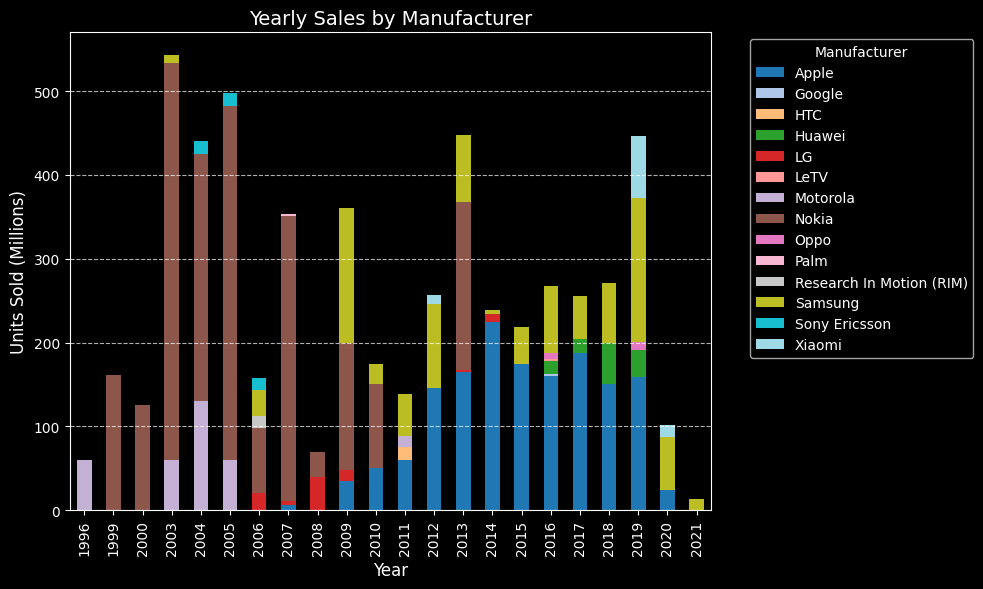

In [50]:
yearly_sales_by_manufacturer.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('Yearly Sales by Manufacturer', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Units Sold (Millions)', fontsize=12)
plt.legend(title='Manufacturer', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Yearly sold items count

In [20]:
yearly_sales = df.groupby('year')['units_sold_m'].sum().sort_index()
yearly_sales

year
1996     60.0
1999    161.0
2000    126.0
2003    543.0
2004    440.0
2005    497.5
2006    158.0
2007    353.0
2008     70.0
2009    360.0
2010    175.0
2011    139.0
2012    256.2
2013    447.5
2014    238.5
2015    219.1
2016    267.0
2017    255.7
2018    271.6
2019    446.2
2020    101.9
2021     13.5
Name: units_sold_m, dtype: float64

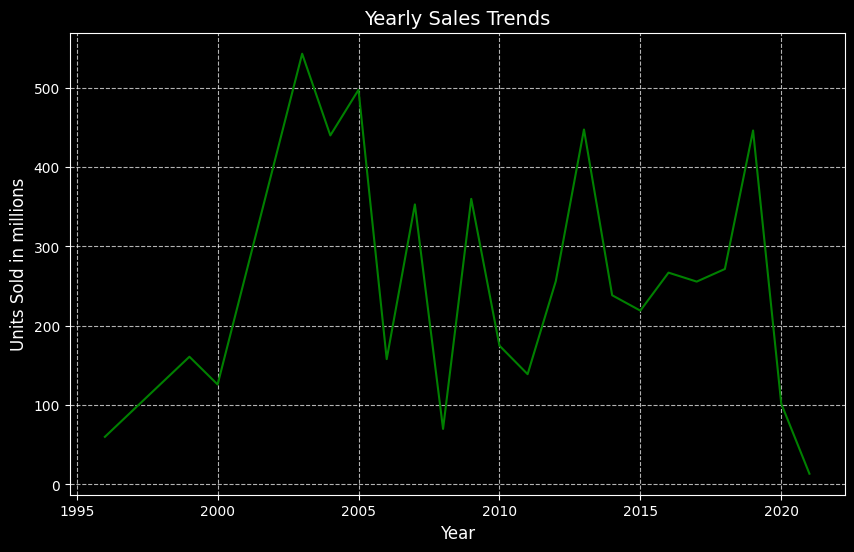

In [32]:
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, markers='o', color='green')
plt.title('Yearly Sales Trends', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Units Sold in millions', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.show()

## Model wise sold items count

In [17]:
top_models = df[['model', 'units_sold_m']].sort_values(by='units_sold_m', ascending=False)
top_models

,model,units_sold_m
0,1100,250.0
1,1110,247.5
2,iPhone 6 and iPhone 6 Plus,224.0
3,"105 (2013), 105 (2015)",200.0
4,iPhone 6S and iPhone 6S Plus,174.1
...,...,...
106,G2,3.0
107,LeEco Le 1s,3.0
108,Pixel and Pixel XL,2.1
109,Centro,2.0


C:\Users\KALYANI\AppData\Local\Temp\ipykernel_23164\2876994869.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='units_sold_m', y='model', data=top_models, palette='viridis', edgecolor='black')


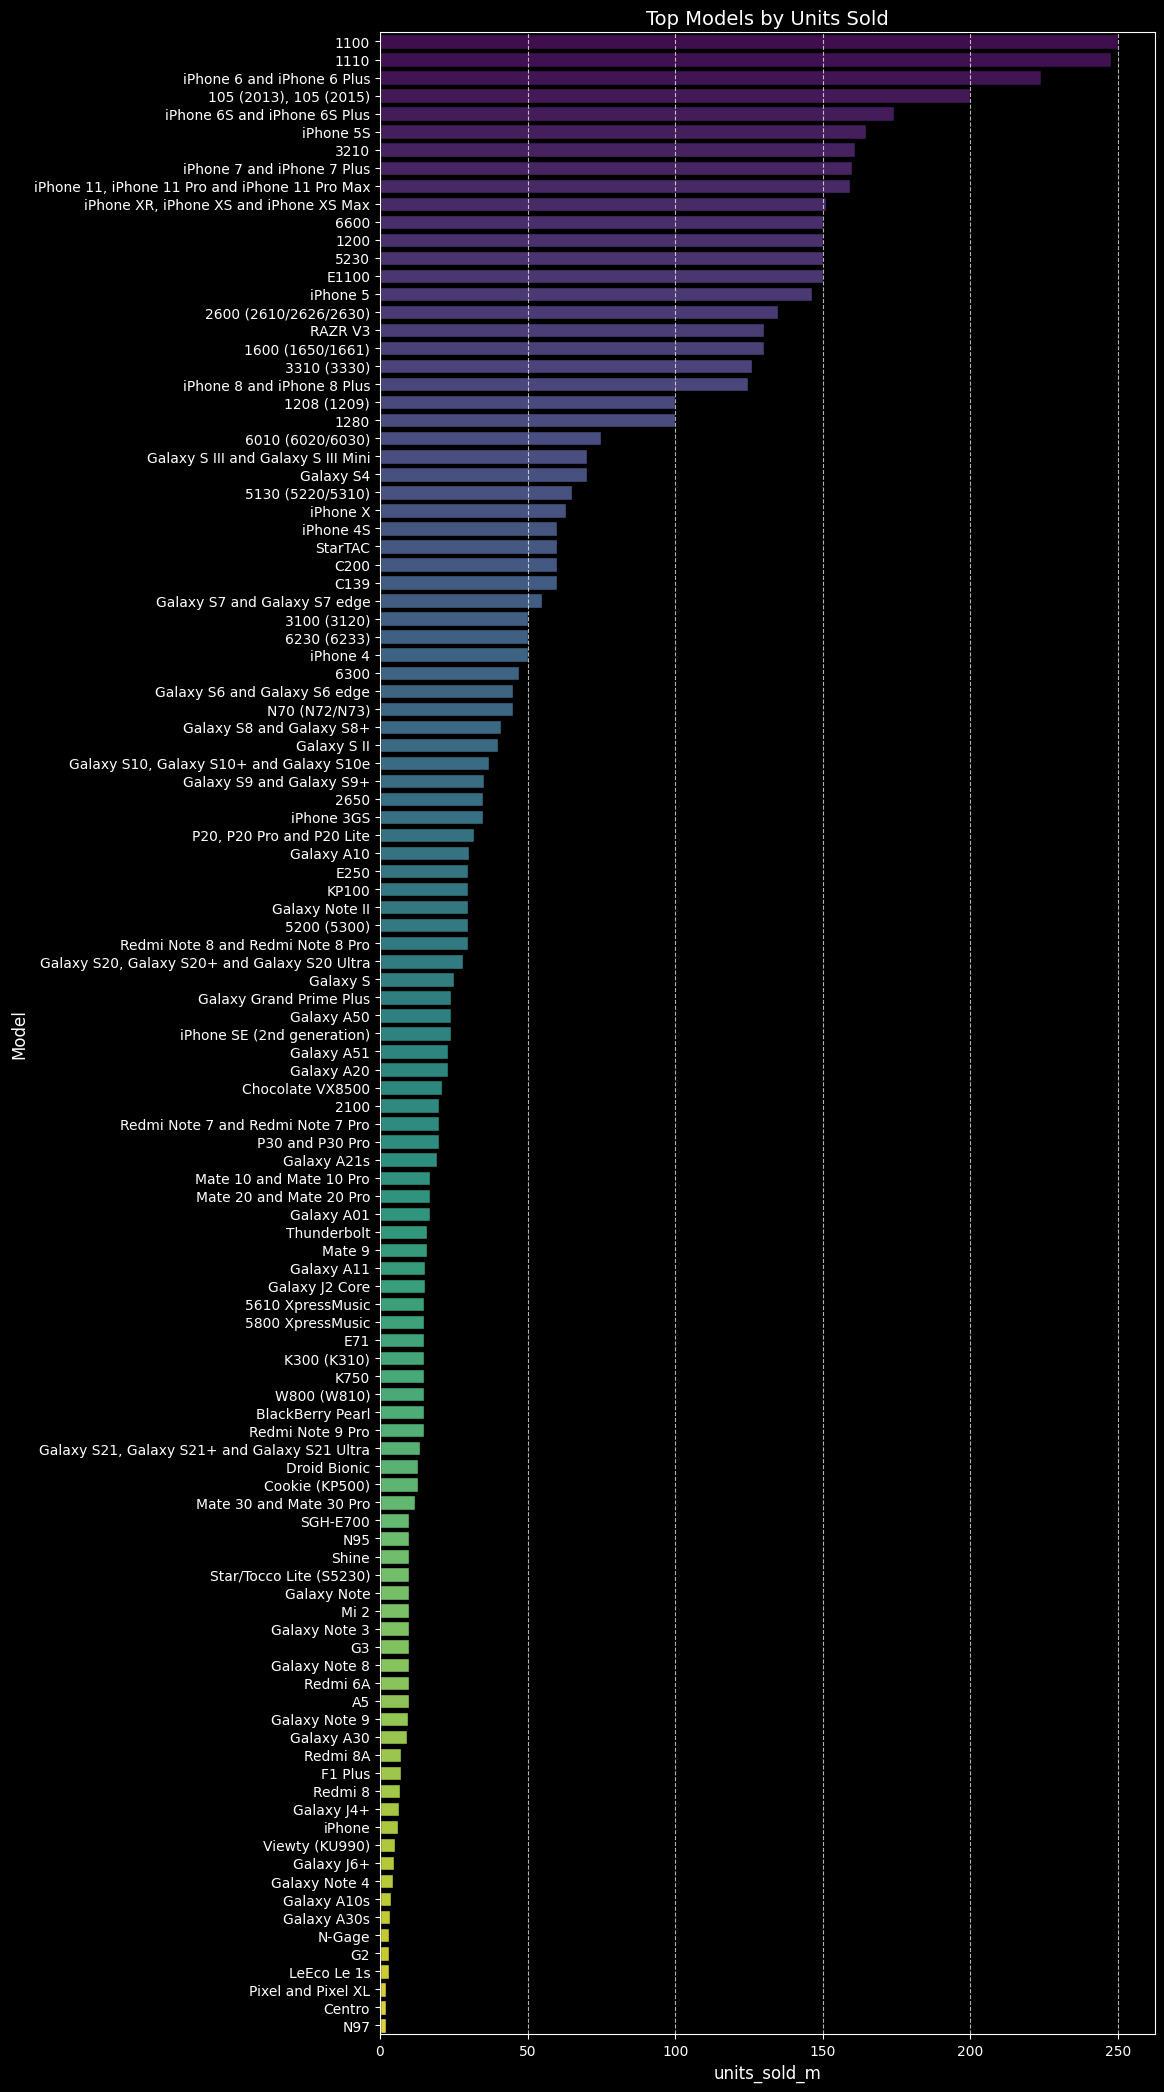

In [38]:
plt.figure(figsize=(10,26))
sns.barplot(x='units_sold_m', y='model', data=top_models, palette='viridis', edgecolor='black')
plt.title('Top Models by Units Sold', fontsize=14)
plt.xlabel('units_sold_m', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Top manufacturer with respect of their total sold items 

In [16]:
top_manufacturer = df.groupby(['manufacturer'])['units_sold_m'].sum().sort_values(ascending=False) # type: ignore
top_manufacturer

manufacturer
Nokia                       2376.5
Apple                       1541.9
Samsung                      953.6
Motorola                     323.0
Huawei                       113.8
Xiaomi                        99.1
LG                            92.0
Sony Ericsson                 45.0
Oppo                          16.7
HTC                           16.0
Research In Motion (RIM)      15.0
LeTV                           3.0
Google                         2.1
Palm                           2.0
Name: units_sold_m, dtype: float64

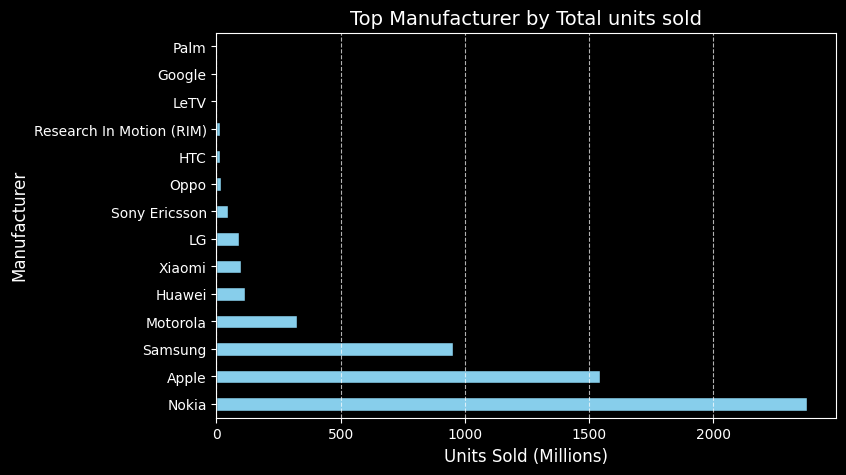

In [30]:
plt.figure(figsize=(8,5))
top_manufacturer.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Top Manufacturer by Total units sold', fontsize=14)
plt.xlabel('Units Sold (Millions)', fontsize=12)
plt.ylabel('Manufacturer', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Form wise sold items count

In [21]:
form_popularity = df.groupby('form')['units_sold_m'].sum().sort_values(ascending=False) # type: ignore
form_popularity

form
Touchscreen     2760.2
Bar             2466.5
Flip phone       235.0
Slider           116.0
Keyboard bar      17.0
Taco               3.0
Tilt slider        2.0
Name: units_sold_m, dtype: float64

C:\Users\KALYANI\AppData\Local\Temp\ipykernel_23164\1875705538.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=form_popularity.index, y=form_popularity.values, palette='cool', edgecolor='black')


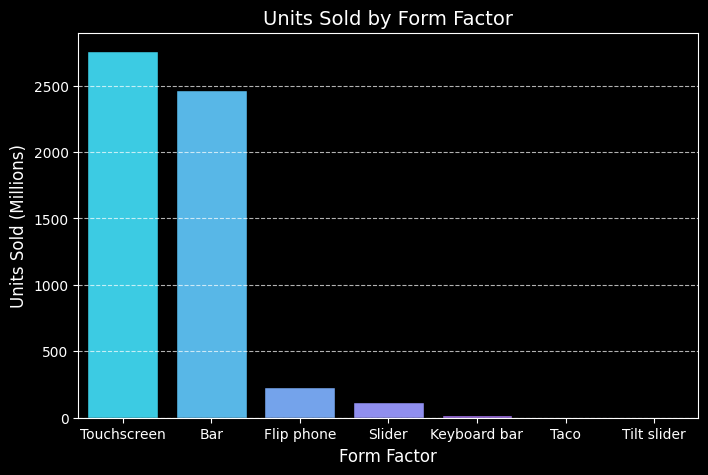

In [48]:
plt.figure(figsize=(8, 5))
sns.barplot(x=form_popularity.index, y=form_popularity.values, palette='cool', edgecolor='black')
plt.title('Units Sold by Form Factor', fontsize=14)
plt.xlabel('Form Factor', fontsize=12)
plt.ylabel('Units Sold (Millions)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## How much units total sold smartphone and non-smartphone

In [22]:
smartphone_sales = df.groupby('smartphone')['units_sold_m'].sum()
smartphone_sales.index = ['Non-smartphone', 'Smartphone']
smartphone_sales

Non-smartphone    2620.5
Smartphone        2979.2
Name: units_sold_m, dtype: float64

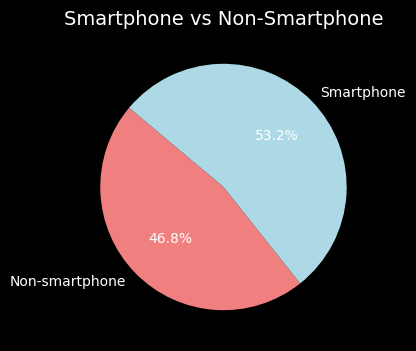

In [43]:
plt.figure(figsize=(4,4))
plt.pie(smartphone_sales, labels=smartphone_sales.index, autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], startangle=140)
plt.title('Smartphone vs Non-Smartphone', fontsize=14)
plt.show()

## Based on selling products, find out manufacturer market share

In [23]:
total_sales = df['units_sold_m'].sum()
manufacturer_market_share = (df.groupby('manufacturer')['units_sold_m'].sum() / total_sales) * 100
manufacturer_market_share

manufacturer
Apple                       27.535404
Google                       0.037502
HTC                          0.285730
Huawei                       2.032252
LG                           1.642945
LeTV                         0.053574
Motorola                     5.768166
Nokia                       42.439774
Oppo                         0.298230
Palm                         0.035716
Research In Motion (RIM)     0.267871
Samsung                     17.029484
Sony Ericsson                0.803614
Xiaomi                       1.769738
Name: units_sold_m, dtype: float64

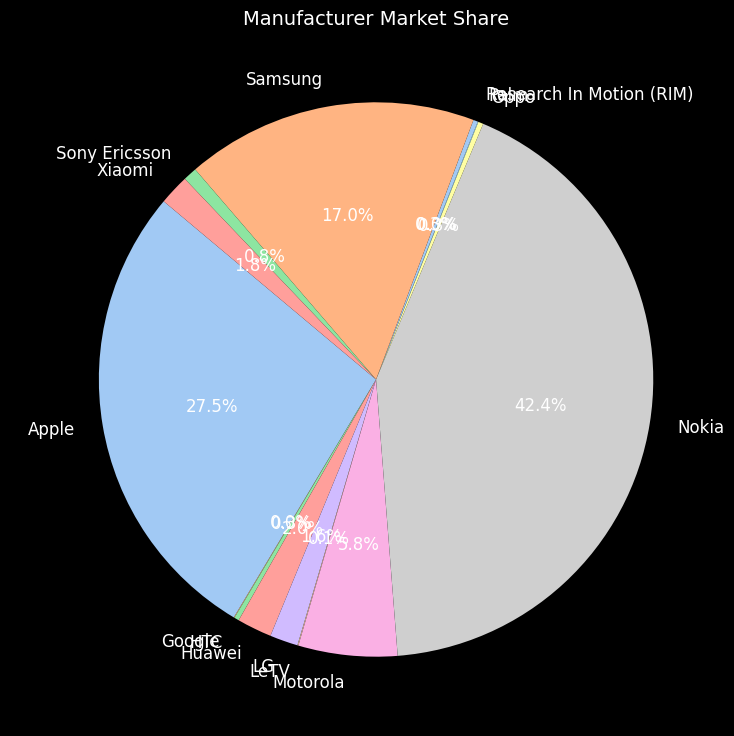

In [45]:
from turtle import color


plt.figure(figsize=(9,9))
manufacturer_market_share.plot.pie(autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'), textprops={'fontsize':12})
plt.title('Manufacturer Market Share', fontsize=14)
plt.ylabel(' ')
plt.show()

## Conclusion based on analysis

In [24]:
peak_year = yearly_sales.idxmax()
peak_sales = yearly_sales.max()
print(f"\nPeak Year for Sales: {peak_year} with {peak_sales}M units sold")



Peak Year for Sales: 2003 with 543.0M units sold


In [28]:
# Convert 'smartphone' column to numerical values
df['smartphone_numeric'] = df['smartphone'].map({'Yes': 1, 'No': 0})

# Calculate the correlation
correlation = df[['smartphone_numeric', 'units_sold_m']].corr().loc['smartphone_numeric', 'units_sold_m']
print(f"\nCorrelation between Smartphone and Units Sold: {correlation:.2f}")



Correlation between Smartphone and Units Sold: -0.28


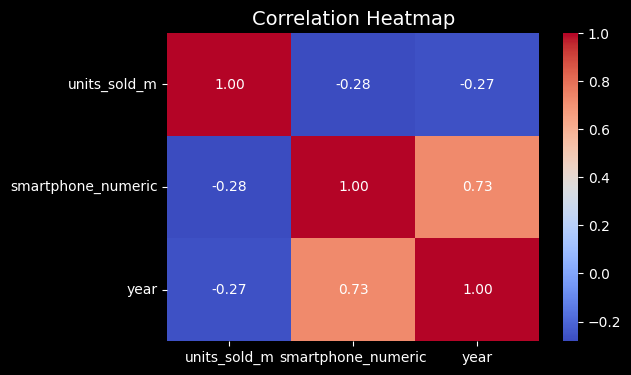

In [47]:
correlation_data = df[['units_sold_m', 'smartphone_numeric', 'year']]

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

# Visualizations

## Units sold Distribution

C:\Users\KALYANI\AppData\Local\Temp\ipykernel_23164\3668953470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smartphone', y='units_sold_m', data=df, palette='Set2')


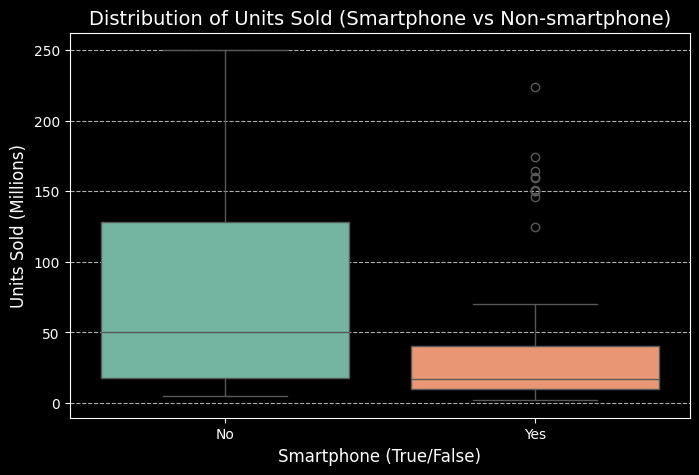

In [51]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='smartphone', y='units_sold_m', data=df, palette='Set2')
plt.title('Distribution of Units Sold (Smartphone vs Non-smartphone)', fontsize=14)
plt.xlabel('Smartphone (True/False)', fontsize=12)
plt.ylabel('Units Sold (Millions)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [53]:
print(f"The peak year for sales was {peak_year} with {peak_sales}M units sold.")

The peak year for sales was 2003 with 543.0M units sold.


In [55]:
print(f"The correlation between smartphone and units sold is {correlation:.2f}.")

The correlation between smartphone and units sold is -0.28.


In [57]:
print(f"The top manufacturer by total units sold is Nokia with {top_manufacturer['Nokia']}M units sold.")

The top manufacturer by total units sold is Nokia with 2376.5M units sold.


In [59]:
print(f"The manufacturer with the highest market share is Nokia with {manufacturer_market_share['Nokia']:.2f}% of the market.")

The manufacturer with the highest market share is Nokia with 42.44% of the market.


In [60]:
print(f"Non-smartphone sales: {smartphone_sales['Non-smartphone']}M units and Smartphone sales: {smartphone_sales['Smartphone']}M units")

Non-smartphone sales: 2620.5M units and Smartphone sales: 2979.2M units
